In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import pycountry
from geopy.geocoders import Nominatim


from plotnine import *
from plotnine import ggplot, geom_map, aes, scale_fill_cmap, theme, labs
from plotnine.data import mpg
import plotnine as p9
import squarify
import plotly.express as px
import plotly.io as pio
import os
import geopandas as gpd
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots


# **Data Cleaning**

In [73]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Investigate-Hotel-Business-using-Data-Visualization/main/Dataset/hotel_bookings_data.csv'
source = 'hotel_bookings.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,98,0,1,Check-Out,2015-07-03


In [74]:
source1 = 'countries_codes_and_coordinates.csv'
# df = pd.read_csv(source, na_values = missing_values)
df_country = pd.read_csv(source1)
# Remove quotation marks from the data
df_country= df_country.replace('"', '', regex=True)
#replace column name Alpha-3 code to country
df_country.rename(columns = {'Alpha-3 code':'country'}, inplace = True)
df_country.head()

,Country,Alpha-2 code,country,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33,65
1,Åland Islands,AX,ALA,248,60.116667,19.9
2,Albania,AL,ALB,8,41,20
3,Algeria,DZ,DZA,12,28,3
4,American Samoa,AS,ASM,16,-14.3333,-170


In [75]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (119390, 32)
Number of rows : 119390
Number of columns : 32


In [76]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [77]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [78]:
# check the missing values.
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = missing / df.shape[0] * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
missing_df


,Missing Values,Percentage
children,4,0.003
country,488,0.409
agent,16340,13.686
company,112593,94.307


In [79]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

children = True - ['nan']
country = True - ['nan']
agent = True - ['nan']
company = True - ['nan']


In [80]:
# Filling zero value in the company because no company is involved
df['company'] = df['company'].fillna(0)
# Filling zero value in the agent because no agent is involved
df['agent'] = df['agent'].fillna(0)
# Filling zero rating on children is probably because the customer has no children
df['children'] = df['children'].fillna(0)
# Filling 'unknown' for unavailable city
df['country'] = df['country'].fillna('unknown')

**Observations:**

- There are several missing values in the columns:
    - `company` with a total of 94% null values, amounting to `112,593 rows`.
    
        Filling zero values in the company column since no company is involved.
        
    - `agent` with a total of 13% null values, amounting to `16,340 rows`.
    
        Filling zero values in the agent column since no agent is involved.
        
    - `city` with a total of 0.4% null values, amounting to `488 rows`.
    
        Filling 'unknown' for unavailable city entries.
        
    - `children` with a total of 0.003% null values, amounting to `4 rows`.
    
        Filling zero values for children, as it is likely that the customers have no children.

In [81]:
# number of NULL entries after cleaning
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [82]:
#check duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :", duplicate_rows.shape[0])

Number of duplicate rows : 31994


In [83]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40772,City Hotel,0,0,2015,August,32,7,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14,0,0,Transient,75,0,1,Check-Out,2015-08-09
40802,City Hotel,0,0,2015,August,32,7,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,14,0,0,Transient,75,0,1,Check-Out,2015-08-09
40821,City Hotel,0,0,2015,August,32,8,0,1,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,89,0,1,Check-Out,2015-08-09
40838,City Hotel,0,0,2015,August,32,8,0,1,2,0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,89,0,1,Check-Out,2015-08-09
76792,City Hotel,0,0,2015,August,33,10,1,0,2,0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-08-11
76793,City Hotel,0,0,2015,August,33,10,1,0,2,0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-08-11
76794,City Hotel,0,0,2015,August,33,10,1,0,2,0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-08-11
41067,City Hotel,0,0,2015,August,33,11,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,38,0,Transient-Party,88,0,0,Check-Out,2015-08-12
41073,City Hotel,0,0,2015,August,33,11,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,38,0,Transient-Party,88,0,0,Check-Out,2015-08-12
41071,City Hotel,0,0,2015,August,33,11,0,1,2,0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,0,0,Transient,80,0,0,Check-Out,2015-08-12


**Observations:** 

This dataset has many duplicates, totaling 32K rows.


However, in this process, we will not drop the duplicate rows, assuming that it is due to the absence of customer IDs in the data, and it could be a coincidence that the booking criteria are the same for several customers. Thus, we assume that the data is not duplicate.

In [84]:
# Adjsuting data types
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null 

In [85]:
# We change the data type of `float64` which had null before, `children`, `agent`, and `company` to `int64`
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [86]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  

In [87]:
# Handling Invalid Values
for x in df.columns : 
    unq = list(df[x].unique())
    unq.sort()
    
    print (f'===== {x} =====')
    if len(unq) >= 13:
        prt = list(unq[:12])+['.....']
        print (f'{prt}')
    else:
        print (f'{unq}')
    print()

===== hotel =====
['City Hotel', 'Resort Hotel']

===== is_canceled =====
[0, 1]

===== lead_time =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== arrival_date_year =====
[2015, 2016, 2017]

===== arrival_date_month =====
['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

===== arrival_date_week_number =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== arrival_date_day_of_month =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== stays_in_weekend_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, '.....']

===== stays_in_week_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== adults =====
[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, '.....']

===== children =====
[0, 1, 2, 3, 10]

===== babies =====
[0, 1, 2, 9, 10]

===== meal =====
['BB', 'FB', 'HB', 'SC', 'Undefined']

===== country =====
['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATA', 'ATF',

In [88]:
df["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

**Replacing incorrect values in `meal` column**

There are several values in the 'meal' feature that do not match any defined categories. These values will be replaced with 'No Meal' since it is assumed that 'Undefined' indicates customers who did not order any meals, be it for Breakfast, Dinner, or Full Board (Breakfast + Dinner). This replacement will ensure clarity and consistency in the data. Data will be replaced to unify entries with the same meaning, reducing redundancy in the data.

- Changing `Undefined` to `No Meal`

In [89]:
# Replacing the category 'Undefined' with 'No Meal'.
df['meal'] = df['meal'].replace(['Undefined'],'SC')

In [90]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [91]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

- Total Guest (Number of Customers / Guests) <= 0, or there are no guests at all.
- Total duration of the night <= 0, or not available in the data for the duration of the stay.
- If there is a single data entry for adr (Average Daily Rate), it might be due to a data calculation error. Since there is only one row, it will be dropped to avoid errors in the analysis.

In [92]:
# Renaming Columns for better understanding
df.rename(columns = {
    'adults': 'no_of_adults',
    'children': 'no_of_children',
    'stays_in_weekend_nights': 'no_of_weekend_nights',
    'stays_in_week_nights': 'no_of_week_nights',
    'meal': 'type_of_meal_plan',
    'required_car_parking_spaces': 'required_car_parking_space',
    'reserved_room_type': 'room_type_reserved',
    'lead_time': 'lead_time',
    'arrival_date_year': 'arrival_year',
    'arrival_date_month': 'arrival_month',
    'arrival_date_day_of_month': 'arrival_date',
    'market_segment': 'market_segment_type',
    'is_repeated_guest': 'repeated_guest',
    'previous_cancellations': 'no_of_previous_cancellations',
    'previous_bookings_not_canceled': 'no_of_previous_bookings_not_canceled',
    'adr': 'avg_price_per_room',
    'total_of_special_requests': 'no_of_special_requests',
    'is_canceled': 'booking_status'
}, inplace=True)

df['arrival_month_num'] = df['arrival_month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
})

#df['type_of_meal_plan'] = \
#    df['type_of_meal_plan'].map({
#        'BB': 0, 'HB': 2, 'SC': 1, 'Undefined': 1, 'FB': 3
#    })

#df['market_segment_type'] = \
#    df['market_segment_type'].map({
#        "'Online TA": 1, "Offline TA/TO": 0, "Corporate": 2, "Complementary": 4, "Aviation": 3
#    })

#df['room_type_reserved'] = \
#    df['room_type_reserved'].map({
#        'A':  0, 'D':  1, 'E':  3, 'F':  2, 'G':  4, 'B':  5, 'C':  6
#    })

#df['market_segment_type'].fillna(5, inplace=True)
#df['room_type_reserved'].fillna(7, inplace=True)

In [93]:
# Dropping unnecesary rows
print("======= Before Drop Unnecessary Data =======")
print("Total Data = {} rows".format(df.shape[0]))

# Number of Customers / Guests (adults/children/babies)
df['total_guests'] = df['no_of_adults'] + df['no_of_children'] + df['babies']
print('No Customers / Guest = {} rows'.format(df[df['total_guests'] <= 0].shape[0]))

# Total duration of the night (weekend/weekdays)
df['stay_duration'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
print('No Duration of Stay = {} rows'.format(df[df['stay_duration'] <= 0].shape[0]))

# Negative values in ADR (Average Daily Rate)
print('Negative values in ADR (Average Daily Rate) = {} rows'.format(df[df['avg_price_per_room'] < 0].shape[0]))

print("======= After Drop Unnecessary Data =======")

# Filter the data according to the requirements 
df_final = df[(df['total_guests'] > 0) & 
              (df['stay_duration'] > 0) &
              ~(df['avg_price_per_room'] < 0)]

print("Total Data = {} rows".format(df_final.shape[0]))

======= Before Drop Unnecessary Data =======
Total Data = 119390 rows
No Customers / Guest = 180 rows
No Duration of Stay = 715 rows
Negative values in ADR (Average Daily Rate) = 1 rows
======= After Drop Unnecessary Data =======
Total Data = 118564 rows


# **Exploratory Data Analysis**

In [94]:
df.columns

Index(['hotel', 'booking_status', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date_week_number', 'arrival_date', 'no_of_weekend_nights',
       'no_of_week_nights', 'no_of_adults', 'no_of_children', 'babies',
       'type_of_meal_plan', 'country', 'market_segment_type',
       'distribution_channel', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'room_type_reserved', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'avg_price_per_room', 'required_car_parking_space',
       'no_of_special_requests', 'reservation_status',
       'reservation_status_date', 'arrival_month_num', 'total_guests',
       'stay_duration'],
      dtype='object')

## Splitting the Data into Numerical and Categorical Features

In [95]:
# Specify which numeric columns should be treated as categorical
categorical_numeric_columns = ['booking_status','arrival_year','arrival_month_num','repeated_guest','agent','company']

# Split into numerical and categorical columns
numerical_df = df.drop(columns=categorical_numeric_columns).select_dtypes(include=['number'])
categorical_df = pd.concat([df[categorical_numeric_columns], df.select_dtypes(exclude=['number'])], axis=1)

# Categorical Data Analysis

In [96]:
categorical_df.columns

Index(['booking_status', 'arrival_year', 'arrival_month_num', 'repeated_guest',
       'agent', 'company', 'hotel', 'arrival_month', 'type_of_meal_plan',
       'country', 'market_segment_type', 'distribution_channel',
       'room_type_reserved', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_categorical_distributions_seaborn(data, categorical_columns=None):
    """
    Plot distributions and provide analytics of specified categorical data in a DataFrame using Seaborn.

    Parameters:
    data (pd.DataFrame): The data frame containing the categorical data.
    categorical_columns (list): List of column names to be treated as categorical.

    Returns:
    None
    """
    # Set Seaborn theme
    sns.set_theme(style="darkgrid")

    # If categorical_columns is not provided, select object and category dtype columns
    if categorical_columns is None:
        categorical_columns = data.select_dtypes(include=['object', 'category']).columns
    else:
        # Validate provided columns
        categorical_columns = [col for col in categorical_columns if col in data.columns]

    # Determine the number of rows and columns for subplots
    n_cols = 3  # Number of plots per row
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Compute the number of rows needed

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

    for i, column in enumerate(categorical_columns):
        row, col = divmod(i, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        
        # Calculate the counts and percentages of each category
        counts = data[column].value_counts()
        percentages = data[column].value_counts(normalize=True) * 100

        # Create a DataFrame to display counts and percentages
        summary_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})

        # Plot the distribution using Seaborn
        sns.countplot(x=column, data=data, palette="Set2", ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        
        # Print the summary statistics
        print(f"Summary statistics for '{column}':")
        print(summary_df)
        print("\n" + "-"*40 + "\n")

    # Remove any empty subplots
    for j in range(i + 1, n_rows * n_cols):
        row, col = divmod(j, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()




In [98]:
#plot_all_categorical_distributions_seaborn(categorical_df, categorical_columns=['booking_status', 'arrival_year', 'arrival_month', 'type_of_meal_plan',
#       'market_segment_type', 'repeated_guest', 'room_type_reserved', 'hotel', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type',
#       'reservation_status'])

In [99]:
def UVA_numeric(data, var_group):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with 
    histogram and KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    n_cols = 2
    n_rows = math.ceil(size / n_cols)
    plt.figure(figsize=(20, 5 * n_rows))
  
    # Looping for each variable
    for j, i in enumerate(var_group):
        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.rcParams['font.size'] = '14'
        plt.rcParams['lines.linewidth'] = 2
        plt.rcParams['lines.markersize'] = 5
        plt.subplot(n_rows, n_cols, j + 1)
        sns.histplot(data[i], color='teal', alpha=0.6, kde=True)
        sns.lineplot(x=points, y=[0, 0], color='black', label="std_dev")
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color='orange', label="min/max")
        sns.scatterplot(x=[mean], y=[0], color='red', label="mean")
        sns.scatterplot(x=[median], y=[0], color='blue', label="median")
        plt.xlabel('{}'.format(i), fontsize=14)
        plt.ylim(-0.1, )
        plt.ylabel('density', fontsize=14)
        plt.title('std_dev = {}; kurtosis = {}; skew = {};\nrange = {}; mean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)), fontsize=12)
  
    plt.tight_layout()
    plt.show()


In [100]:
#UVA_numeric(numerical_df, numerical_df.columns)

## Bi Variate Analysis

In [101]:
def compare_numerical_with_booking_status(data, target_variable='booking_status'):
    """
    Compare all numerical variables with the target categorical variable using box plots.

    Parameters:
    data (pd.DataFrame): The data frame containing the numerical data and the target variable.
    target_variable (str): The name of the categorical target variable to compare against.

    Returns:
    None
    """
    # Select numerical columns
    numerical_columns = numerical_df.columns

    # Remove the target variable if it's in the numerical columns
    if target_variable in numerical_columns:
        numerical_columns = numerical_columns.drop(target_variable)

    # Determine the number of rows and columns for subplots
    n_cols = 2  # Number of plots per row
    n_rows = math.ceil(len(numerical_columns) / n_cols)  # Compute the number of rows needed

    # Create subplots
    plt.figure(figsize=(20, 5 * n_rows))

    for i, column in enumerate(numerical_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(x=target_variable, y=column, data=data, palette="Set2")
        plt.title(f'{column} by {target_variable}')
        plt.xlabel(target_variable)
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df' is your DataFrame with numerical data and 'booking_status' as the target variable
#compare_numerical_with_booking_status(df, target_variable='booking_status')

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function Definition
def BVA_category(data, target, feature):
    """
    Plot bar plot, density plot, violin plot, and box plot for the given feature against the target.

    Parameters:
    data (pd.DataFrame): The data frame containing the data.
    target (str): The name of the target variable.
    feature (str): The name of the feature variable.

    Returns:
    None
    """
    # Using different plots
    fig, ax = plt.subplots(2, 2, figsize=(25, 25))
    fig.tight_layout(h_pad=3, w_pad=3)

    # Define subplot titles
    ax1 = ax[0, 0]
    ax[0, 0].set_title('Bar Plot', size=12)
    ax2 = ax[0, 1]
    ax[0, 1].set_title('Density Plot', size=12)
    ax3 = ax[1, 0]
    ax[1, 0].set_title('Violin Plot', size=12)
    ax4 = ax[1, 1]
    ax[1, 1].set_title('Box Plot', size=12)

    # Add overall title and adjust it so that it doesn't overlap with subplot titles
    plt.subplots_adjust(top=0.95)
    sns.barplot(x=target, y=feature, data=data, palette="Set2", ax=ax1)
    sns.kdeplot(data=data, x=feature, hue=target, alpha=0.2,
                fill=True, legend=True, ax=ax2, palette="Set2")
    sns.violinplot(data=data, x=target, y=feature, linewidth=0.5, palette="Set2", ax=ax3)
    sns.boxplot(data=data, x=target, y=feature,
                width=0.2, palette="Set2", ax=ax4)
    plt.show()

# Function to apply BVA_category to all numerical columns
def compare_all_numerical_with_booking_status(data, target_variable='booking_status'):
    """
    Apply BVA_category function to all numerical variables against the target variable.

    Parameters:
    data (pd.DataFrame): The data frame containing the numerical data and the target variable.
    target_variable (str): The name of the categorical target variable to compare against.

    Returns:
    None
    """
    # Select numerical columns
    numerical_columns = numerical_df.columns

    # Remove the target variable if it's in the numerical columns
    if target_variable in numerical_columns:
        numerical_columns = numerical_columns.drop(target_variable)

    # Loop through each numerical column and apply BVA_category
    for feature in numerical_columns:
        print(f"Generating plots for {feature} vs {target_variable}")
        BVA_category(data, target_variable, feature)

# Example usage:
# Assuming 'df' is your DataFrame with numerical data and 'booking_status' as the target variable
#compare_all_numerical_with_booking_status(df, target_variable='booking_status')


## Correlation Matrix

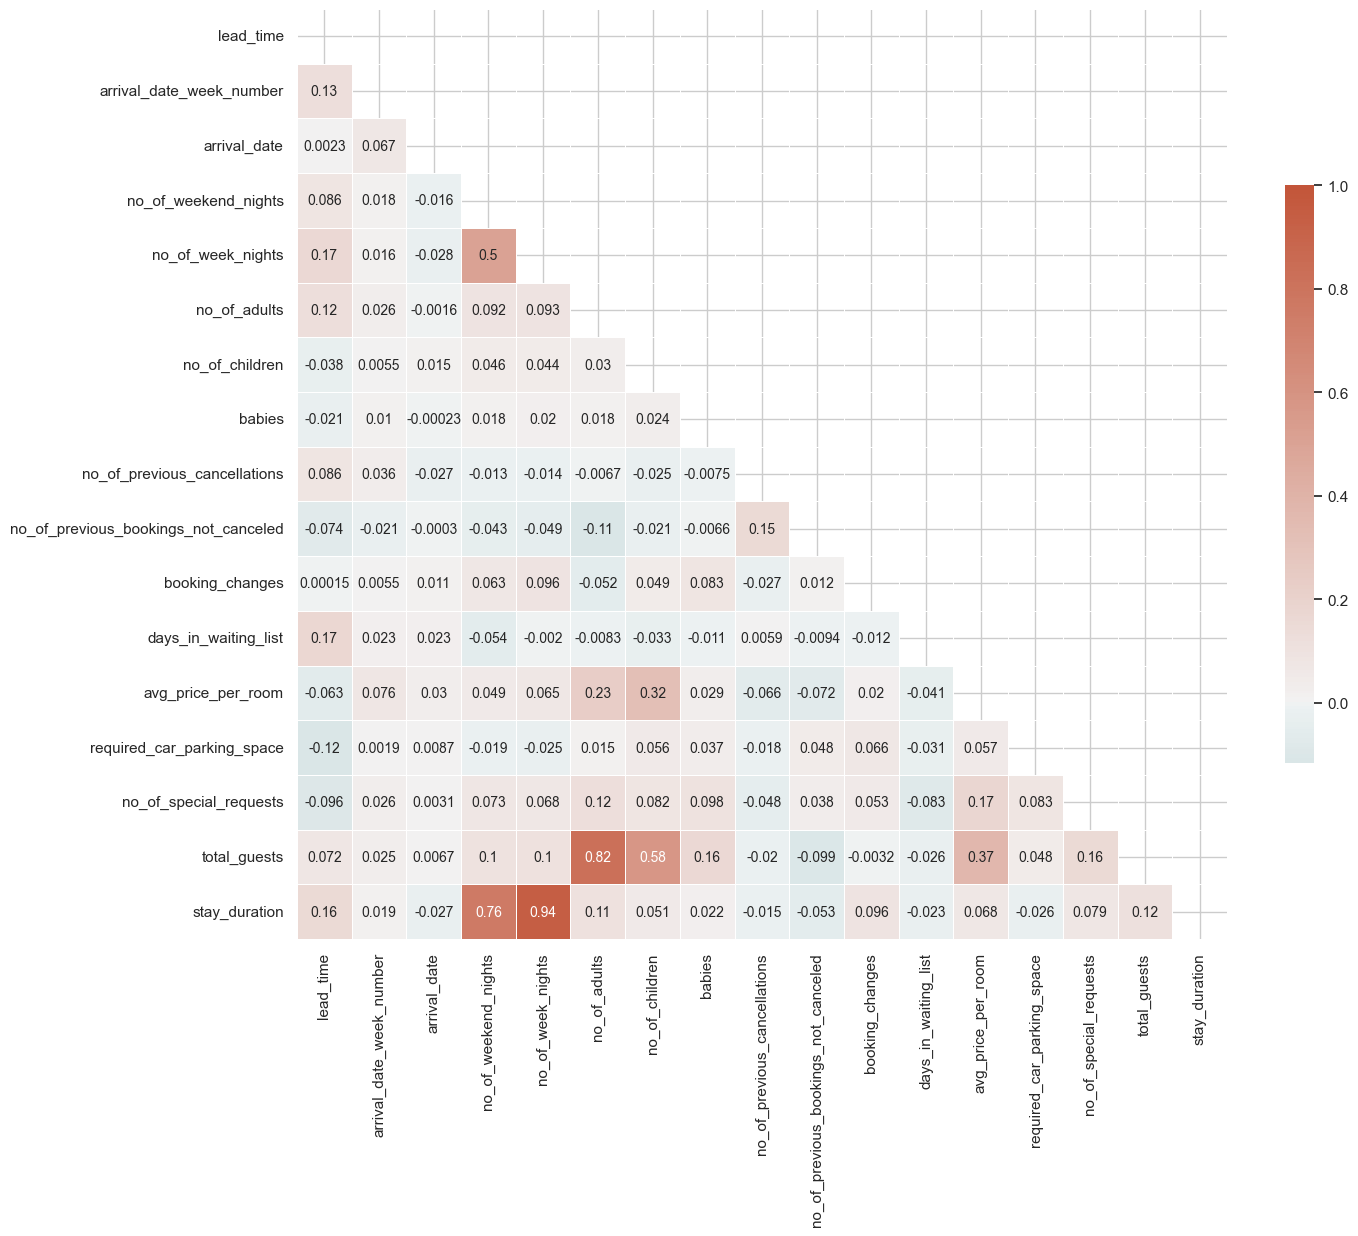

In [103]:
corr =numerical_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, annot_kws={"fontsize":10}, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
sns.set(font_scale=1.4)

## **PART 1.UNDERSTANDING THE SEASONALITY OF THE BOOKINGS**

- Objective: HotelFlix aims to better understand when their customers make their reservations and increase the revenue creating a price model that increases the price of reservations in high season and decreases in low season. 

- Use the data to visualise a line plot that shows the number of bookings per day and month and use it to understand the seasonality of the bookings. 
Propose a new price model based on days, weeks or months, dividing the periods that you select in a minimum of 3 categories and a maximum of 5 categories. Justify your answer.

In [104]:
# Combine the columns into a single datetime column with error coercion
df_final['arrival_dates'] = pd.to_datetime(df_final[['arrival_year', 'arrival_month_num', 'arrival_date']].rename(columns={'arrival_year': 'year', 'arrival_month_num': 'month', 'arrival_date': 'day'}), errors='coerce')

In [105]:
# Check for invalid dates
invalid_dates = df_final[df_final['arrival_dates'].isna()]

# Print invalid dates
print("Invalid dates found:")
print(invalid_dates)


Invalid dates found:
Empty DataFrame
Columns: [hotel, booking_status, lead_time, arrival_year, arrival_month, arrival_date_week_number, arrival_date, no_of_weekend_nights, no_of_week_nights, no_of_adults, no_of_children, babies, type_of_meal_plan, country, market_segment_type, distribution_channel, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, room_type_reserved, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, avg_price_per_room, required_car_parking_space, no_of_special_requests, reservation_status, reservation_status_date, arrival_month_num, total_guests, stay_duration, arrival_dates]
Index: []


In [106]:
#export_csv = df_final.to_csv(r'hotel_bookings_cleaned.csv', index = None, header=True)
#print("File exported successfully")

Create an aggregate table showing the comparison of the number of hotel bookings each month based on the hotel types. We will pay attention to the year of arrival data.

In [107]:
df_book = df_final.groupby(["hotel","arrival_month","arrival_month_num"]) \
                  .agg({"arrival_year":["nunique","count"]}) \
                  .reset_index()

df_book.columns = ["hotel","arrival_month","arrival_month_num", "year", "total_booking"]
df_book

,hotel,arrival_month,arrival_month_num,year,total_booking
0,City Hotel,April,4,2,7458
1,City Hotel,August,8,3,8952
2,City Hotel,December,12,2,4097
3,City Hotel,February,2,2,4917
4,City Hotel,January,1,2,3712
5,City Hotel,July,7,3,8054
6,City Hotel,June,6,2,7874
7,City Hotel,March,3,2,6411
8,City Hotel,May,5,2,8184
9,City Hotel,November,11,2,4309


Normalize the data. We will pay attention to the data for July and August months.

In [108]:
df_book[df_book["year"] != 2]

,hotel,arrival_month,arrival_month_num,year,total_booking
1,City Hotel,August,8,3,8952
5,City Hotel,July,7,3,8054
13,Resort Hotel,August,8,3,4860
17,Resort Hotel,July,7,3,4532


It can be observed that both the City and Resort Hotels have data for the past 3 years in the columns of July and August. In contrast, the data for other months only includes the last 2 years. Hence, it is necessary to normalize the data by calculating the average values. This step is crucial to ensure an appropriate comparison and accurate interpretation of the trend across all months.

In [109]:
df_book['avg_booking'] = round(df_book['total_booking'] / df_book['year'])
df_book

,hotel,arrival_month,arrival_month_num,year,total_booking,avg_booking
0,City Hotel,April,4,2,7458,3729
1,City Hotel,August,8,3,8952,2984
2,City Hotel,December,12,2,4097,2048
3,City Hotel,February,2,2,4917,2458
4,City Hotel,January,1,2,3712,1856
5,City Hotel,July,7,3,8054,2685
6,City Hotel,June,6,2,7874,3937
7,City Hotel,March,3,2,6411,3206
8,City Hotel,May,5,2,8184,4092
9,City Hotel,November,11,2,4309,2154


In [110]:
hotels_book = df_book.groupby('hotel').agg({'avg_booking':'sum'})
hotels_book.rename(columns={'avg_booking':'total_avg_booking'}, inplace=True)
hotels_book

,total_avg_booking
hotel,
City Hotel,36614
Resort Hotel,18268


In [111]:
df_book = df_book.merge(hotels_book, on='hotel')

In [112]:
df_book['percentage'] = round((df_book['avg_booking']/df_book['total_avg_booking'])*100, 2)
df_book

,hotel,arrival_month,arrival_month_num,year,total_booking,avg_booking,total_avg_booking,percentage
0,City Hotel,April,4,2,7458,3729,36614,10.180
1,City Hotel,August,8,3,8952,2984,36614,8.150
2,City Hotel,December,12,2,4097,2048,36614,5.590
3,City Hotel,February,2,2,4917,2458,36614,6.710
4,City Hotel,January,1,2,3712,1856,36614,5.070
5,City Hotel,July,7,3,8054,2685,36614,7.330
6,City Hotel,June,6,2,7874,3937,36614,10.750
7,City Hotel,March,3,2,6411,3206,36614,8.760
8,City Hotel,May,5,2,8184,4092,36614,11.180
9,City Hotel,November,11,2,4309,2154,36614,5.880


In [113]:
df_book.sort_values(by=["hotel", "arrival_month"], inplace=True)

# Define sorter
sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_month' to categorical with the defined order
df_book['arrival_month'] = pd.Categorical(df_book['arrival_month'], 
                                          categories=sorter, 
                                          ordered=True)

# Sort values by 'hotel' and 'arrival_month'
df_book.sort_values(by=["hotel", "arrival_month"], inplace=True)

# Reset index
df_book.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(df_book)

           hotel arrival_month  arrival_month_num  year  total_booking  \
0     City Hotel       January                  1     2           3712   
1     City Hotel      February                  2     2           4917   
2     City Hotel         March                  3     2           6411   
3     City Hotel         April                  4     2           7458   
4     City Hotel           May                  5     2           8184   
5     City Hotel          June                  6     2           7874   
6     City Hotel          July                  7     3           8054   
7     City Hotel        August                  8     3           8952   
8     City Hotel     September                  9     2           7377   
9     City Hotel       October                 10     2           7554   
10    City Hotel      November                 11     2           4309   
11    City Hotel      December                 12     2           4097   
12  Resort Hotel       January        

Create a line plot to show the changes in the increase or decrease in the number of hotel bookings each month based on the hotel types.

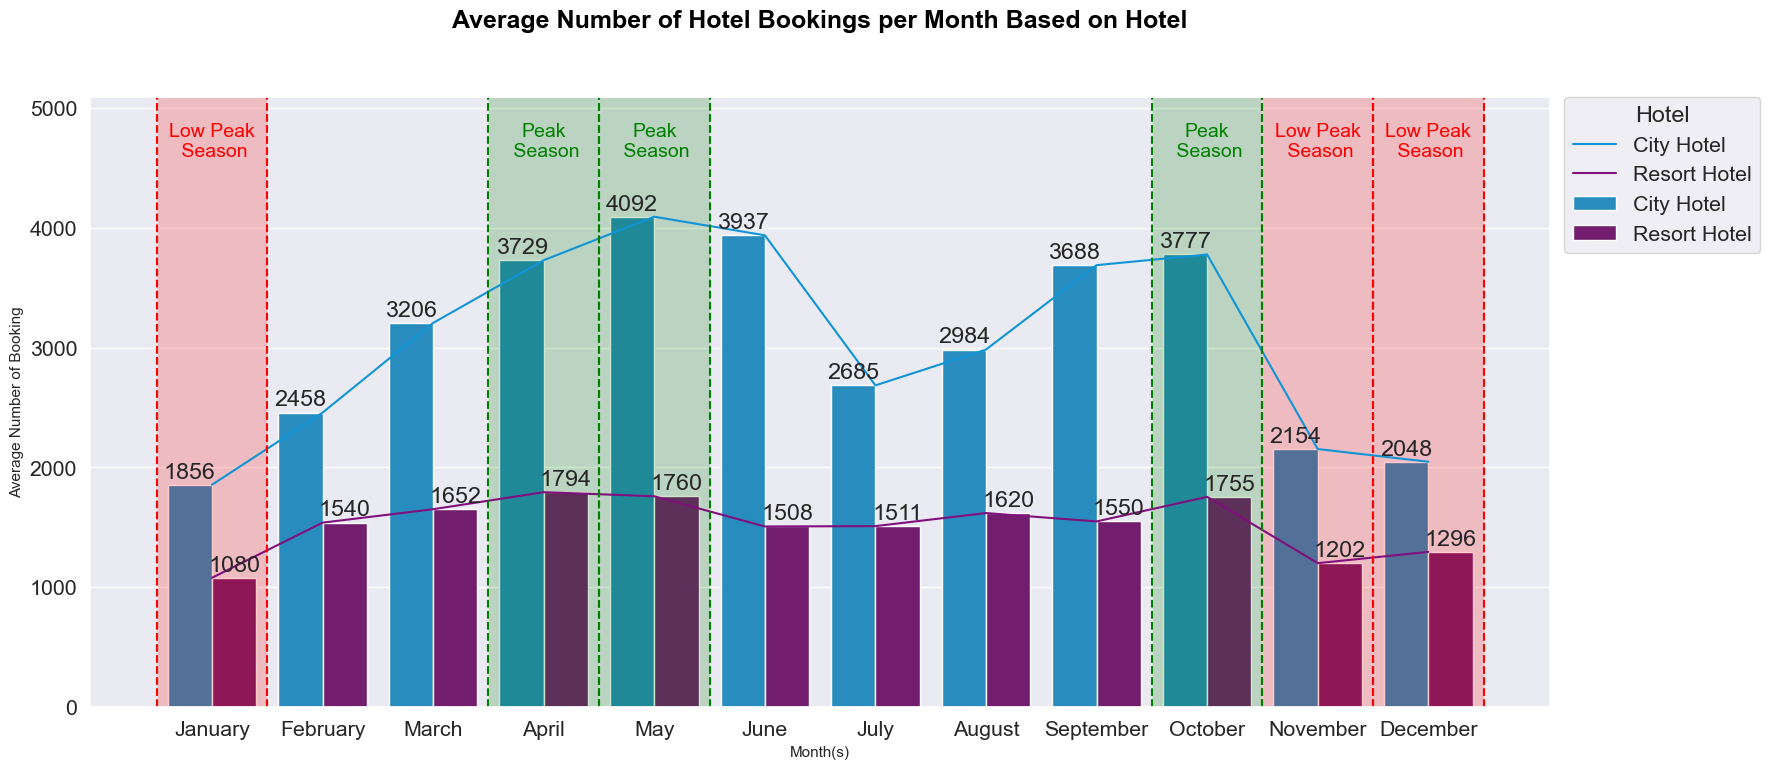

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the monthly average bookings
monthly_avg = df_book.groupby('arrival_month_num')['avg_booking'].mean()

# Calculate the 25th and 75th percentiles
low_threshold = np.percentile(monthly_avg, 25)
high_threshold = np.percentile(monthly_avg, 75)

# Identify low and peak seasons
low_season_months = monthly_avg[monthly_avg <= low_threshold].index
peak_season_months = monthly_avg[monthly_avg >= high_threshold].index

# Set figure & size
fig, ax = plt.subplots(figsize=(18, 8))

color = ['#0F95D7', '#810F7C']

# Create bar plot and line plot
sns.barplot(x='arrival_month', y='avg_booking', data=df_book, hue='hotel', palette=color)
sns.lineplot(x='arrival_month', y='avg_booking', data=df_book, hue='hotel', palette=color)

# Add labels to the bar plot
for container in ax.containers:
    ax.bar_label(container, padding=2)

# Create area plots for Peak Season and Low Peak Season
max_book = max(df_book['avg_booking'])

# Function to plot highlighted areas and dotted lines
def highlight_season(ax, months, color, label, y_position, max_book):
    for month in months:
        start = month - 1
        end = month
        ax.axvspan(start - 0.5, end - 0.5, facecolor=color, alpha=0.2)
        ax.axvline(start - 0.5, ls='--', color=color)
        ax.axvline(end - 0.5, ls='--', color=color)
        mid_point = (start + end) / 2
        ax.text(x=mid_point - 0.5, y=max_book + y_position, s=label, fontsize=14, color=color, ha='center')

# Plot low and peak seasons
highlight_season(ax, low_season_months, 'red', 'Low Peak\n Season', 500, max_book)
highlight_season(ax, peak_season_months, 'green', 'Peak\n Season', 500, max_book)

# Set title, labels & legend
plt.title("Average Number of Hotel Bookings per Month Based on Hotel", fontsize=18, color='black', weight='bold', pad=50)
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

# Set axis limits
plt.ylim(0, max_book + 1000)

# sns.despine() # to hide lines on the outside of the axis (top and right)
plt.tight_layout()
plt.show() 


### **Price Modelling and  Optimal Pricing**

Price modeling  answers the question:if I charge X , how many rooms will I sell? The price model will represent the relationship between a hotel's price and demand.

In the next part of the workbook, we will create Price model and explore how we could use it to estimate the optimal price for a hotel.

Typically fully deployed pricing model account for factors such as overall market demand, seasonality, competitors' pricing, Length of stay, lead times, and a myriad of other factors. As the goal of this workbook is for us to understand how price modeling and optimization work, we will focus only on seasonality and overall market demand driven by holidays.

In [115]:
df_price = df_final.copy()

In [116]:
df_price.head()

,hotel,booking_status,lead_time,arrival_year,arrival_month,arrival_date_week_number,arrival_date,no_of_weekend_nights,no_of_week_nights,no_of_adults,no_of_children,babies,type_of_meal_plan,country,market_segment_type,distribution_channel,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,room_type_reserved,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_price_per_room,required_car_parking_space,no_of_special_requests,reservation_status,reservation_status_date,arrival_month_num,total_guests,stay_duration,arrival_dates
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-07-02,7,1,1,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75,0,0,Check-Out,2015-07-02,7,1,1,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03,7,2,2,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03,7,2,2,2015-07-01
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107,0,0,Check-Out,2015-07-03,7,2,2,2015-07-01


In [117]:
# Ensure 'lead_time' is numeric
df_price['lead_time'] = pd.to_numeric(df_price['lead_time'], errors='coerce')

In [118]:
#covert reservation_status_date to date format
df_price['arrival_dates'] = pd.to_datetime(df_price['arrival_dates'])
df_price['reservation_status_date'] = pd.to_datetime(df_price['reservation_status_date'])


In [119]:
# Check for NaT or NaN values in 'arrival_dates' or 'lead_time'
if df_price['arrival_dates'].isnull().any() or df_price['lead_time'].isnull().any():
    print("Warning: There are NaN values in 'arrival_dates' or 'lead_time' columns. Please check your data.")
else:
    # Calculate booking_date
    df_price['booking_date'] = df_price['arrival_dates'] - pd.to_timedelta(df_price['lead_time'], unit='d')

    print(df_price[['arrival_dates', 'lead_time', 'booking_date']].head())

  arrival_dates  lead_time booking_date
2    2015-07-01          7   2015-06-24
3    2015-07-01         13   2015-06-18
4    2015-07-01         14   2015-06-17
5    2015-07-01         14   2015-06-17
6    2015-07-01          0   2015-07-01


In [120]:
#extract booking month from booking_date in number format
df_price['booking_month_num'] = df_price['booking_date'].dt.month

In [121]:
#assign month number to booking_month
df_price['booking_month'] = df_price['booking_month_num'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [122]:
#extract booking week from booking_date
df_price['booking_week'] = df_price['booking_date'].dt.isocalendar().week
df_price['booking_year'] = df_price['booking_date'].dt.year

In [123]:
df_price.head()

,hotel,booking_status,lead_time,arrival_year,arrival_month,arrival_date_week_number,arrival_date,no_of_weekend_nights,no_of_week_nights,no_of_adults,no_of_children,babies,type_of_meal_plan,country,market_segment_type,distribution_channel,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,room_type_reserved,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_price_per_room,required_car_parking_space,no_of_special_requests,reservation_status,reservation_status_date,arrival_month_num,total_guests,stay_duration,arrival_dates,booking_date,booking_month_num,booking_month,booking_week,booking_year
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-07-02,7,1,1,2015-07-01,2015-06-24,6,June,26,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75,0,0,Check-Out,2015-07-02,7,1,1,2015-07-01,2015-06-18,6,June,25,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03,7,2,2,2015-07-01,2015-06-17,6,June,25,2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03,7,2,2,2015-07-01,2015-06-17,6,June,25,2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107,0,0,Check-Out,2015-07-03,7,2,2,2015-07-01,2015-07-01,7,July,27,2015


In [124]:
df_price['dow'] = df_price['arrival_dates'].dt.day_name()

### Building seasonality

Hotel prices vary by season; therefore, it is essential that our model accounts for this. While we will take care of major seasonality by doing our dynamic pricing at the DOW and Month level, some special holidays could impact those results. These holidays influence our demand, so our pricing should reflect the specific demand levels for those days.

When modeling the holiday demand, we need to account that the impact is not only on the day itself, but the holiday could affect the surrounding days.

The hotel from this data set is located in Portugal; while there are many holidays, we will focus on the key holidays: Easter, Christmas, and New Year's. 

When building a model for your hotel, you must evaluate which holidays impact your demand and account for those.

In [125]:
import holidays
import datetime
holiday_dates = holidays.CountryHoliday('PT', years=[2015,2016,2017])

In [126]:
holidays = {
    date: name
    for date, name in holiday_dates.items()
    if name in ['Ano Novo', 'Páscoa', 'Dia de Natal']
}

In [127]:
holidays = {datetime.date(2016, 1, 1): 'Ano Novo',
 datetime.date(2016, 3, 27): 'Páscoa',
 datetime.date(2016, 12, 25): 'Dia de Natal',
 datetime.date(2017, 1, 1): 'Ano Novo',
 datetime.date(2017, 4, 16): 'Páscoa',
 datetime.date(2017, 12, 25): 'Dia de Natal',
 datetime.date(2015, 1, 1): 'Ano Novo',
 datetime.date(2015, 4, 5): 'Páscoa',
 datetime.date(2015, 12, 25): 'Dia de Natal'}

In [128]:
from dateutil.relativedelta import relativedelta

# Define pre and post ranges for each holiday
pre_range_offset = {'Ano Novo': relativedelta(days=-1),
                    'Páscoa': relativedelta(days=-2),
                    'Dia de Natal': relativedelta(days=-3)}

post_range_offset = {'Ano Novo': relativedelta(days=1),
                     'Páscoa': relativedelta(days=2),
                     'Dia de Natal': relativedelta(days=3)}

# Create a new column for holidays
df_price['is_holiday'] = 0

# Set the is_holiday column to 1 for matching dates
for date, name in holidays.items():
    date = pd.to_datetime(date)
    pre_offset = pre_range_offset.get(name)
    post_offset = post_range_offset.get(name)
    
    # Define the range of dates for each holiday
    if pre_offset and post_offset:
        date_range = pd.date_range(start=date + pre_offset, end=date + post_offset)
        
        for single_date in date_range:
            df_price.loc[df_price['arrival_dates'] == single_date, 'is_holiday'] = 1

In [129]:
df_price.tail()

,hotel,booking_status,lead_time,arrival_year,arrival_month,arrival_date_week_number,arrival_date,no_of_weekend_nights,no_of_week_nights,no_of_adults,no_of_children,babies,type_of_meal_plan,country,market_segment_type,distribution_channel,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,room_type_reserved,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_price_per_room,required_car_parking_space,no_of_special_requests,reservation_status,reservation_status_date,arrival_month_num,total_guests,stay_duration,arrival_dates,booking_date,booking_month_num,booking_month,booking_week,booking_year,dow,is_holiday
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.140,0,0,Check-Out,2017-09-06,8,2,7,2017-08-30,2017-08-07,8,August,32,2017,Wednesday,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.430,0,2,Check-Out,2017-09-07,8,3,7,2017-08-31,2017-05-21,5,May,20,2017,Thursday,0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.710,0,4,Check-Out,2017-09-07,8,2,7,2017-08-31,2017-07-28,7,July,30,2017,Thursday,0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.400,0,0,Check-Out,2017-09-07,8,2,7,2017-08-31,2017-05-14,5,May,19,2017,Thursday,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,0,0,Transient,151.200,0,2,Check-Out,2017-09-07,8,2,9,2017-08-29,2017-02-05,2,February,5,2017,Tuesday,0


### Demand Forecasting

10:19:31 - cmdstanpy - INFO - Chain [1] start processing
10:19:31 - cmdstanpy - INFO - Chain [1] done processing


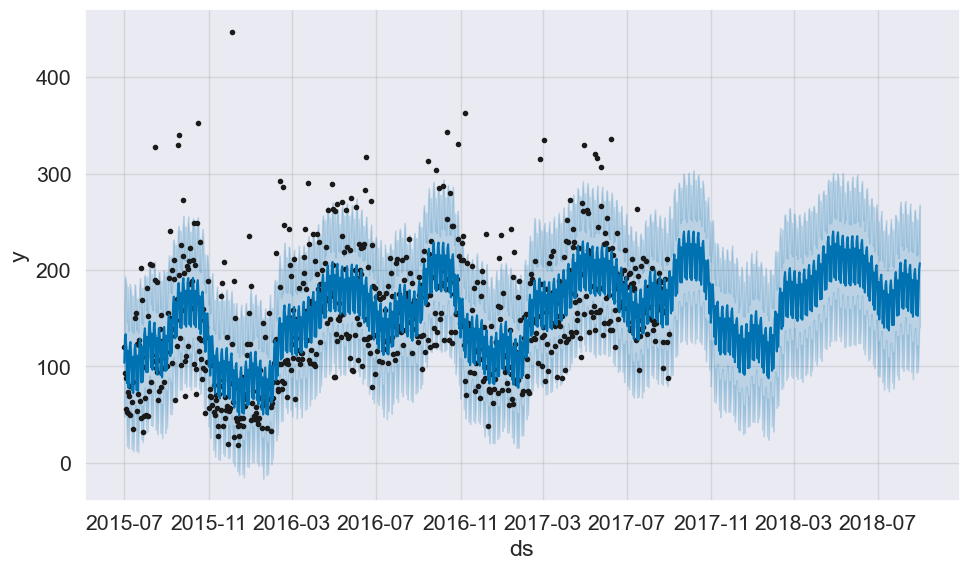

In [130]:
from prophet import Prophet

# Prepare data for Prophet
daily_bookings = df_price.groupby('arrival_dates').size().reset_index(name='bookings')
daily_bookings.rename(columns={'arrival_dates': 'ds', 'bookings': 'y'}, inplace=True)

# Fit Prophet model
model = Prophet()
model.fit(daily_bookings)

# Forecast future demand
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

### Optimization Model

In [131]:
base_price = df_price['avg_price_per_room']  # Assuming base price is the mean ADR

# Define price multipliers for each segment
price_multipliers = {
    'High Demand': 1.5,
    'Medium Demand': 1.2,
    'Low Demand': 0.8
}

In [132]:
# Classify months into demand categories
df_price['price_category_month'] = np.where(df_price['arrival_month'].isin(['May', 'June', 'September', 'October']), 'High Demand',
                             np.where(df_price['arrival_month'].isin(['March', 'April', 'July']), 'Medium Demand', 'Low Demand'))

# Classify days into demand categories
df_price['price_category_day'] = np.where(df_price['dow'].isin(['Thursday', 'Friday']), 'High Demand',
                           np.where(df_price['dow'].isin(['Monday', 'Saturday']), 'Medium Demand', 'Low Demand'))

# Adjust the final price category to account for holidays
df_price['final_price_category'] = df_price.apply(lambda row: 'High Demand' if row['is_holiday'] == 1 else
                                      ('High Demand' if 'High Demand' in [row['price_category_month'], row['price_category_day']] else
                                       ('Medium Demand' if 'Medium Demand' in [row['price_category_month'], row['price_category_day']] else 'Low Demand')), axis=1)

In [133]:
# Calculate adjusted price
df_price['adjusted_price'] = base_price * df_price['final_price_category'].map(price_multipliers)


In [134]:
# Calculate historical revenue
df_price['historical_revenue'] = df_price['avg_price_per_room'] * (df_price['stay_duration'])

# Calculate adjusted revenue based on forecasted demand
df_price['adjusted_revenue'] = df_price['adjusted_price'] * (df_price['stay_duration'])

# Summarize revenue for comparison
revenue_comparison = df_price[['arrival_dates', 'historical_revenue', 'adjusted_revenue']]

# Calculate total historical and adjusted revenue
total_historical_revenue = revenue_comparison['historical_revenue'].sum()
total_adjusted_revenue = revenue_comparison['adjusted_revenue'].sum()

# Calculate revenue difference and percentage change
revenue_difference = total_adjusted_revenue - total_historical_revenue
revenue_percentage_change = (revenue_difference / total_historical_revenue) * 100

# Print the results
print(f"Total Historical Revenue: ${total_historical_revenue:,.2f}")
print(f"Total Adjusted Revenue: ${total_adjusted_revenue:,.2f}")
print(f"Revenue Difference: ${revenue_difference:,.2f}")
print(f"Revenue Percentage Change: {revenue_percentage_change:.2f}%")



Total Historical Revenue: $42,714,213.15
Total Adjusted Revenue: $56,311,954.06
Revenue Difference: $13,597,740.91
Revenue Percentage Change: 31.83%


## **PART 2.CREATING THE SHAPE OF THE FUTURES HOTEL PACKAGES**

Objective: Support HotelFlix understanding the typical period of time that the customers are in the hotels to create attractive different day packages. With this information 
HotelFlix expects to attract 20% more people to their hotels.

Use the data to see the different more repeated days of stay in the hotel in a barplot. Don't differentiate between weekends and week days. Here you can decide how many packages we need and for how many days. Don't be afraid, maybe if you sum one day more to these just created packages you attract more people.


In [135]:
df_price.head()

,hotel,booking_status,lead_time,arrival_year,arrival_month,arrival_date_week_number,arrival_date,no_of_weekend_nights,no_of_week_nights,no_of_adults,no_of_children,babies,type_of_meal_plan,country,market_segment_type,distribution_channel,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,room_type_reserved,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,avg_price_per_room,required_car_parking_space,no_of_special_requests,reservation_status,reservation_status_date,arrival_month_num,total_guests,stay_duration,arrival_dates,booking_date,booking_month_num,booking_month,booking_week,booking_year,dow,is_holiday,price_category_month,price_category_day,final_price_category,adjusted_price,historical_revenue,adjusted_revenue
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75,0,0,Check-Out,2015-07-02,7,1,1,2015-07-01,2015-06-24,6,June,26,2015,Wednesday,0,Medium Demand,Low Demand,Medium Demand,90,75,90
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75,0,0,Check-Out,2015-07-02,7,1,1,2015-07-01,2015-06-18,6,June,25,2015,Wednesday,0,Medium Demand,Low Demand,Medium Demand,90,75,90
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03,7,2,2,2015-07-01,2015-06-17,6,June,25,2015,Wednesday,0,Medium Demand,Low Demand,Medium Demand,117.600,196,235.200
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98,0,1,Check-Out,2015-07-03,7,2,2,2015-07-01,2015-06-17,6,June,25,2015,Wednesday,0,Medium Demand,Low Demand,Medium Demand,117.600,196,235.200
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107,0,0,Check-Out,2015-07-03,7,2,2,2015-07-01,2015-07-01,7,July,27,2015,Wednesday,0,Medium Demand,Low Demand,Medium Demand,128.400,214,256.800


In [136]:
# Select relevant features for segmentation
df_segment = df_price[['stay_duration', 'no_of_adults', 'no_of_children', 'babies', 'repeated_guest','type_of_meal_plan','customer_type','hotel']]

In [137]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the preprocessing for numerical and categorical features
numerical_features = ['stay_duration', 'no_of_adults', 'no_of_children', 'babies']
categorical_features = ['repeated_guest', 'type_of_meal_plan', 'customer_type', 'hotel']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessing pipeline to the data
X = preprocessor.fit_transform(df_segment)

In [138]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the original dataset
df_segment['cluster'] = clusters

In [139]:
# Analyze categorical variables by cluster
categorical_features_with_clusters = df_segment[['repeated_guest', 'type_of_meal_plan', 'customer_type', 'hotel', 'cluster']]

# Function to get the distribution of categorical variables by cluster
def analyze_categorical_by_cluster(df, cat_var, cluster_var='cluster'):
    return df.groupby(cluster_var)[cat_var].value_counts(normalize=True).unstack().fillna(0)

# Create a dictionary to hold DataFrames for each categorical variable
categorical_distributions = {}

# Analyze each categorical variable and store the distribution in the dictionary
for cat_var in categorical_features:
    distribution = analyze_categorical_by_cluster(df_segment, cat_var)
    categorical_distributions[cat_var] = distribution
    print(f"Distribution of {cat_var} by cluster:")
    print(distribution)
    print("\n")

# Convert the dictionary to a more usable format if needed
# For example, combining all distributions into a single DataFrame
combined_distribution = pd.concat(categorical_distributions, axis=1)

# Display the combined distribution DataFrame
print(combined_distribution)


Distribution of repeated_guest by cluster:
repeated_guest     0     1
cluster                   
0              0.990 0.010
1              0.965 0.035
2              0.991 0.009
3              0.989 0.011


Distribution of type_of_meal_plan by cluster:
type_of_meal_plan    BB    FB    HB    SC
cluster                                  
0                 0.692 0.010 0.243 0.055
1                 0.785 0.006 0.095 0.114
2                 0.830 0.006 0.140 0.023
3                 0.721 0.026 0.195 0.057


Distribution of customer_type by cluster:
customer_type  Contract  Group  Transient  Transient-Party
cluster                                                   
0                 0.095  0.005      0.759            0.142
1                 0.024  0.005      0.733            0.238
2                 0.019  0.003      0.911            0.067
3                 0.035  0.005      0.870            0.090


Distribution of hotel by cluster:
hotel    City Hotel  Resort Hotel
cluster                    

In [140]:
#add cluster column from df_segment to df_price
df_price['cluster'] = df_segment['cluster']

In [141]:
#export df_with_holidays to csv
export_csv = df_price.to_csv(r'hotel_bookings_with_holidays.csv', index = None, header=True)

# **Part 4: Preparing the IT Systems for the Demand**

In [142]:
#select only booking status = 0
#df_it = df_price[df_price['booking_status'] == 0]

df_it = df_price.copy()

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ensure your data is loaded correctly
# Assuming df_price is your DataFrame with the necessary columns
# weekly_demand should be a DataFrame with a datetime index and 'bookings' column

# Ensure 'arrival_dates' and 'lead_time' are in correct format
df_it['arrival_dates'] = pd.to_datetime(df_it['arrival_dates'])

# Calculate 'booking_date' from 'arrival_dates' and 'lead_time'
df_it['booking_date'] = df_it['arrival_dates'] - pd.to_timedelta(df_it['lead_time'], unit='d')

# Ensure 'booking_date' is set as datetime
df_it['booking_date'] = pd.to_datetime(df_it['booking_date'])

# Extract week and year from booking_date
df_it['booking_year'] = df_it['booking_date'].dt.year
df_it['booking_week'] = df_it['booking_date'].dt.isocalendar().week

# Group by booking_year and booking_week to get the number of bookings per week
weekly_demand = df_it.groupby(['booking_year', 'booking_week']).size().reset_index(name='bookings')

# Create a datetime index for weekly demand
weekly_demand['date'] = pd.to_datetime(weekly_demand['booking_year'].astype(str) + '-' + weekly_demand['booking_week'].astype(str) + '-1', format='%Y-%W-%w')

# Set the date as the index
weekly_demand.set_index('date', inplace=True)

# Sort the index
weekly_demand.sort_index(inplace=True)

# Check the index and frequency
print(weekly_demand.index)
print(weekly_demand.index.freq)



DatetimeIndex(['2014-03-24', '2014-04-21', '2014-05-05', '2014-06-16',
               '2014-07-07', '2014-07-14', '2014-08-18', '2014-08-25',
               '2014-09-01', '2014-09-08',
               ...
               '2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24',
               '2017-07-31', '2017-08-07', '2017-08-14', '2017-08-21',
               '2017-08-28', '2017-12-25'],
              dtype='datetime64[ns]', name='date', length=161, freq=None)
None


In [144]:
#remove last Row
weekly_demand = weekly_demand[:-1]

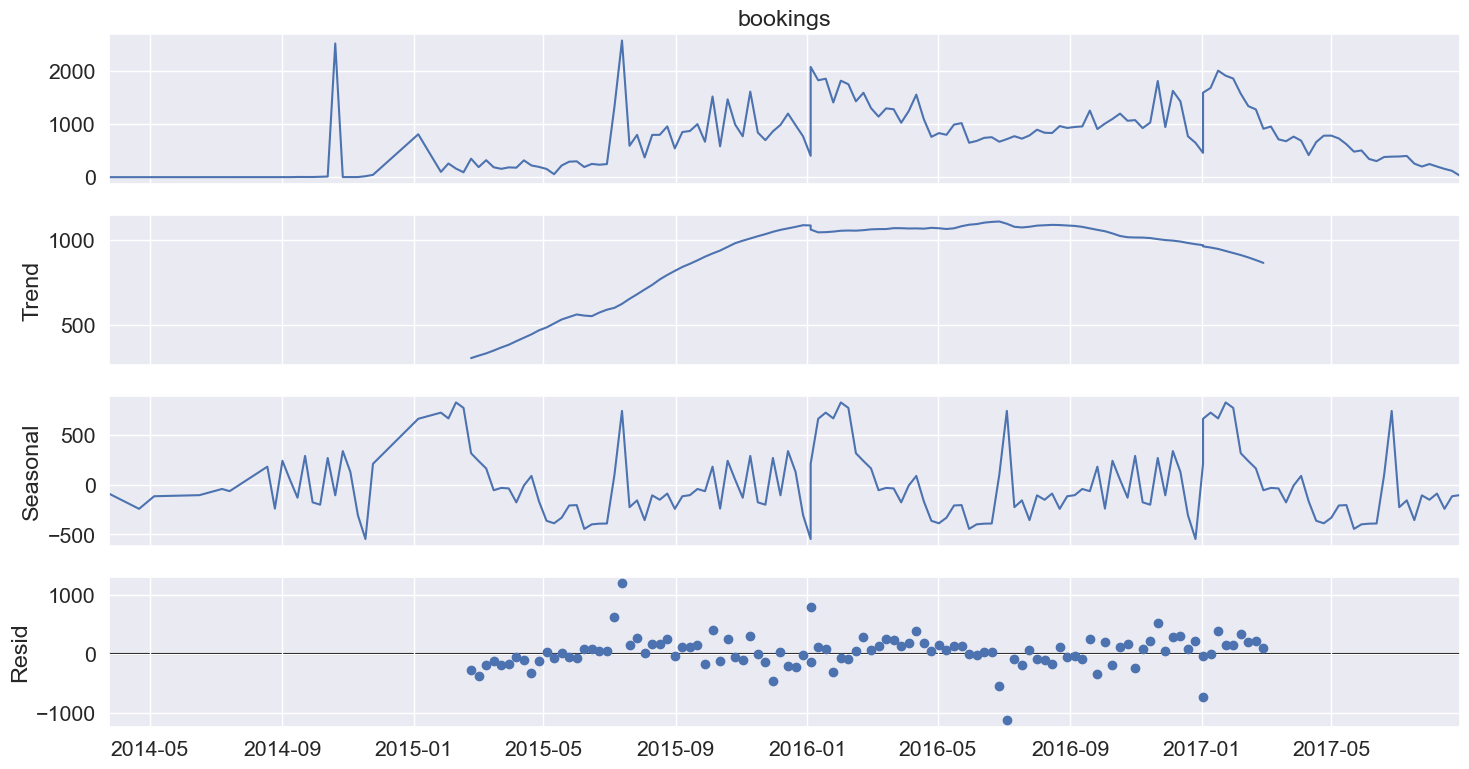

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Decompose the time series to check for seasonality
decomposition = seasonal_decompose(weekly_demand['bookings'], model='additive', period=52)
decomposition.plot()
plt.show()

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                           bookings   No. Observations:                  160
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -811.773
Date:                            Tue, 23 Jul 2024   AIC                           1629.547
Time:                                    10:20:17   BIC                           1637.565
Sample:                                         0   HQIC                          1632.797
                                            - 160                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7237      0.068    -10.619      0.000      -0.857      -0.590
ma.S.L52      -0.9783      3.718   

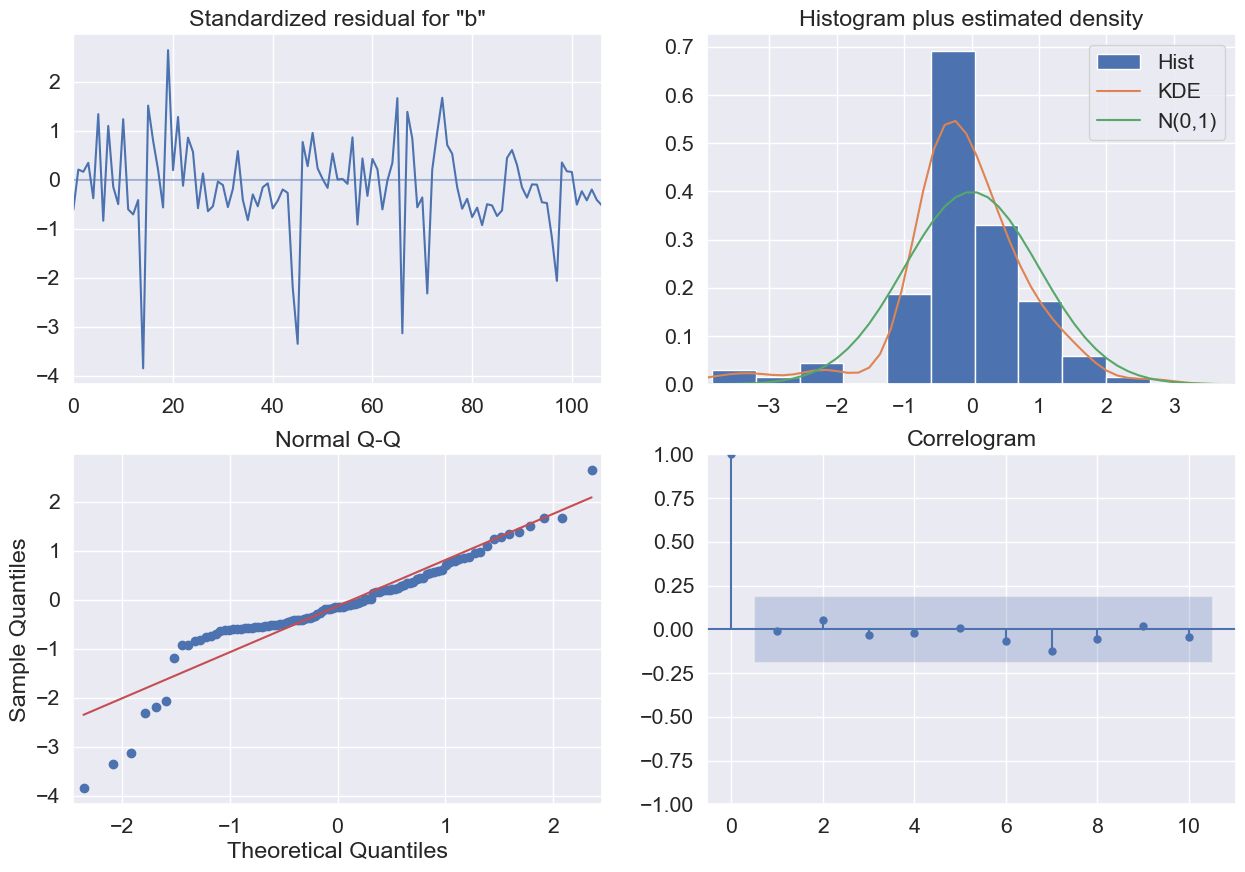

In [146]:
import statsmodels.api as sm

# Define the SARIMA model
sarima_model = sm.tsa.SARIMAX(weekly_demand['bookings'], 
                              order=(0, 1, 1), 
                              seasonal_order=(0, 1, 1, 52), 
                              start=10)

# Fit the model
sarima_results = sarima_model.fit()

# Print the summary of the model
print(sarima_results.summary())

# Plot the diagnostics
sarima_results.plot_diagnostics(figsize=(15, 10))
plt.show()

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\dianaf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



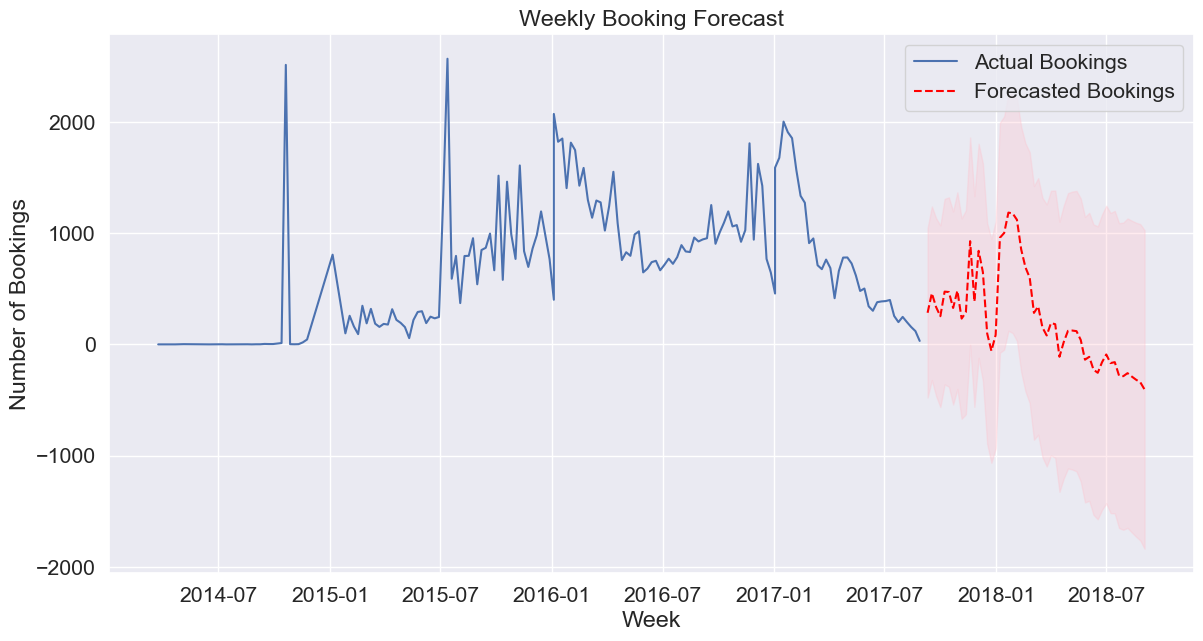

In [147]:
# Fit the SARIMA model
model = sm.tsa.SARIMAX(weekly_demand['bookings'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Forecast future bookings (e.g., next 52 weeks)
forecast = results.get_forecast(steps=52)
forecast_ci = forecast.conf_int()

# Generate forecast index
forecast_index = pd.date_range(start=weekly_demand.index[-1] + pd.Timedelta(weeks=1), periods=52, freq='W')
forecast_df = pd.DataFrame(forecast.predicted_mean.values, index=forecast_index, columns=['Forecast'])
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting the forecast
plt.figure(figsize=(14,7))
plt.plot(weekly_demand.index, weekly_demand['bookings'], label='Actual Bookings')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Bookings', color='red', linestyle='dashed')
plt.fill_between(forecast_df.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Weekly Booking Forecast')
plt.xlabel('Week')
plt.ylabel('Number of Bookings')
plt.legend()
plt.grid(True)
plt.show()


In [148]:
# Debugging: Print the head of forecast_df and forecast_ci to ensure they have correct values
print(forecast_df.head())
print(forecast_ci.head())

            Forecast
2017-09-10   284.925
2017-09-17   460.211
2017-09-24   336.078
2017-10-01   254.199
2017-10-08   474.970
     lower bookings  upper bookings
160        -476.681        1046.530
161        -320.075        1240.497
162        -462.452        1134.607
163        -562.166        1070.564
164        -358.849        1308.789


In [149]:
# Reset index to ignore indexes and use row positions
forecast_df = forecast_df.reset_index().rename(columns={'index': 'Date'})
forecast_ci_reset = forecast_ci.reset_index(drop=True)

In [150]:
# Concatenate the DataFrames based on row positions
forecast_combined = pd.concat([forecast_df, forecast_ci_reset], axis=1)

# Print the first few rows to verify
print(forecast_combined.head())

        Date  Forecast  lower bookings  upper bookings
0 2017-09-10   284.925        -476.681        1046.530
1 2017-09-17   460.211        -320.075        1240.497
2 2017-09-24   336.078        -462.452        1134.607
3 2017-10-01   254.199        -562.166        1070.564
4 2017-10-08   474.970        -358.849        1308.789


In [151]:
#get week number
forecast_combined['booking_week'] = forecast_combined['Date'].dt.isocalendar().week
forecast_combined['booking_year'] = forecast_combined['Date'].dt.isocalendar().year

In [152]:
#export to csv forecast_combined
export_csv = forecast_combined.to_csv(r'forecast_combined.csv', index = None, header=True)